In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from keras.models import Sequential
#from apyori import apriori
from keras.layers import Dense
import matplotlib.pyplot as plt
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

Using TensorFlow backend.
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

In [3]:
Data=pd.read_csv('SpotifyFeatures.csv')
Data.keys()
#List of variables

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [3]:
Data.head()
#Checking data

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [4]:
Data.isnull().sum()
#No null values

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [4]:
#Dropping track ID as it does not affect the popularity
Data=Data.drop('track_id',axis=1)
#Data.head()

In [6]:
Data['genre'].unique()
#List of various genres

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [7]:
Data['artist_name'].unique()
#List of various artists

array(['Henri Salvador', 'Martin & les fées', 'Joseph Williams', ...,
       'Dharmasoul', 'Swim', 'Jr Thomas & The Volcanos'], dtype=object)

C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023245239F60>,
      dtype=object)

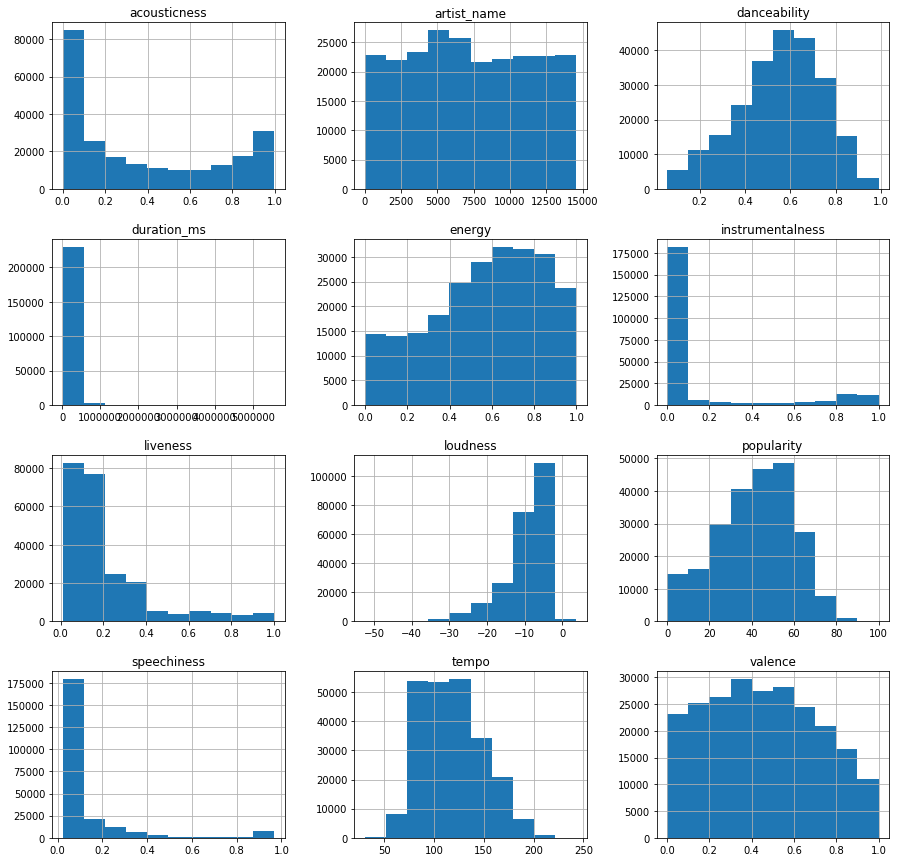

In [33]:
#Data.hist()
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
Data.hist(ax = ax)

In [5]:
v=Data.drop('popularity',axis=1)
v.describe()
#Exploring numerical features

acousticness   danceability   duration_ms         energy  \
count  232725.000000  232725.000000  2.327250e+05  232725.000000   
mean        0.368560       0.554364  2.351223e+05       0.570958   
std         0.354768       0.185608  1.189359e+05       0.263456   
min         0.000000       0.056900  1.538700e+04       0.000020   
25%         0.037600       0.435000  1.828570e+05       0.385000   
50%         0.232000       0.571000  2.204270e+05       0.605000   
75%         0.722000       0.692000  2.657680e+05       0.787000   
max         0.996000       0.989000  5.552917e+06       0.999000   

       instrumentalness       liveness       loudness    speechiness  \
count     232725.000000  232725.000000  232725.000000  232725.000000   
mean           0.148301       0.215009      -9.569885       0.120765   
std            0.302768       0.198273       5.998204       0.185518   
min            0.000000       0.009670     -52.457000       0.022200   
25%            0.000000       0.097400     -11.771000       0.036700   
50%            0.000044       0.128000      -7.762000       0.050100   
75%            0.035800       0.264000      -5.501000       0.105000   
max            0.999000       1.000000       3.744000       0.967000   

               tempo        valence  
count  232725.000000  232725.000000  
mean      117.666585       0.454917  
std        30.898907       0.260065  
min        30.379000       0.000000  
25%        92.959000       0.237000  
50%       115.778000       0.444000  
75%       139.054000       0.660000  
max       242.903000       1.000000

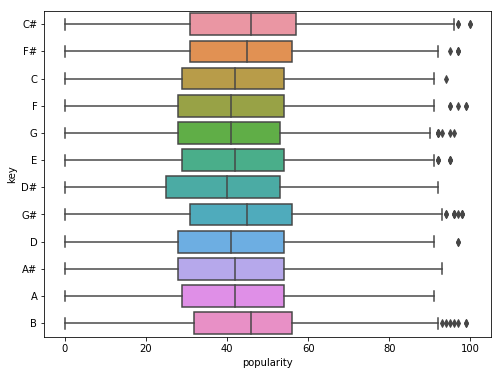

In [9]:
#Checking for patterns in data with categorical variables
#Popularity by key
plt.gcf().set_size_inches(8,6)
sns.boxplot(Data['popularity'],Data['key'])
#Though the spreads are similar, songs in the keys C#,G# and B seem to be slightly more popular

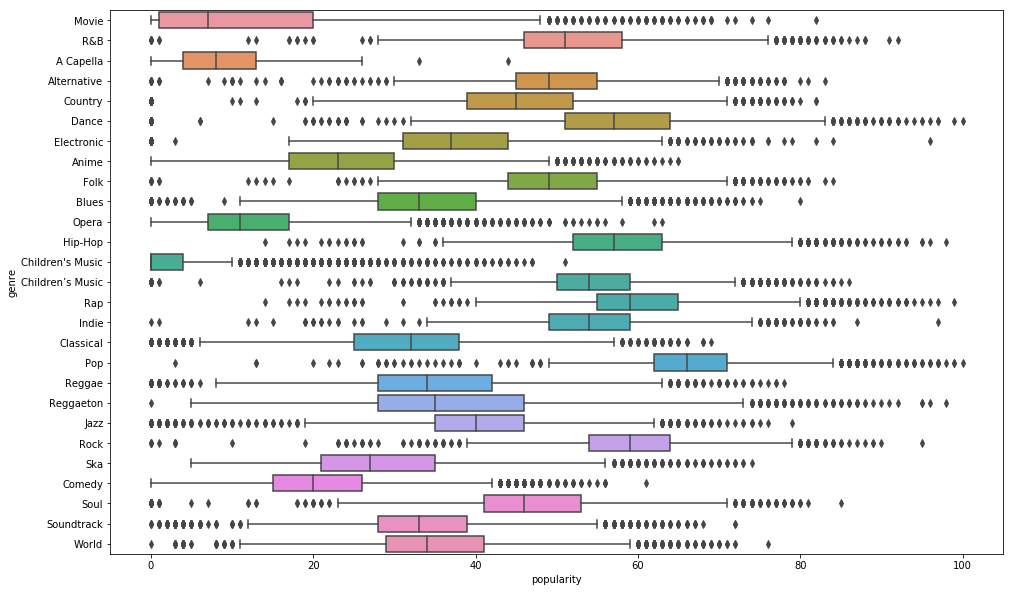

In [35]:
plt.gcf().set_size_inches(16, 10)
sns.boxplot(Data['popularity'],Data['genre'])
#Clear distinction on which genres are very popular
#Top 3 genres: Pop,Rock,Rap (closely followed by Dance and Hip-Hop)

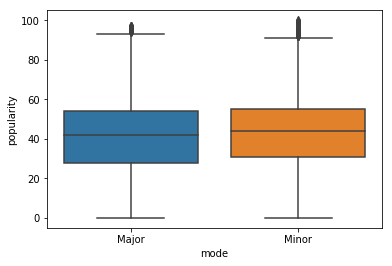

In [5]:
#plt.gcf().set_size_inches(16, 10)
sns.boxplot(Data['mode'],Data['popularity'])

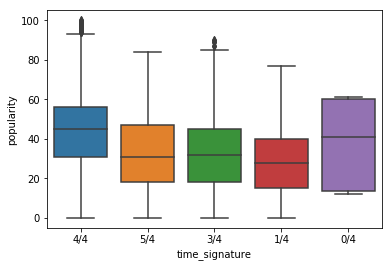

In [24]:
#plt.gcf().set_size_inches(16, 10)
sns.boxplot(Data['time_signature'],Data['popularity'])
#Time signature zero varies a lot, but has almost no outliers
#Time signature 4 seems to have more popularity

In [9]:
#Artist names have some special characters, handling them
#Data['artist'] =Data['artist_name'].str.replace(r"[^a-zA-Z0-9\s]+", "")#\d\_
Data['artist_name'].unique()

array(['Ariana Grande', 'Post Malone', 'Daddy Yankee', ...,
       'Jerry Colonna', 'Mel Levin', 'Peter Savelli'], dtype=object)

In [10]:
Data['artist_name'].head()

0    Ariana Grande
1    Ariana Grande
2    Ariana Grande
3      Post Malone
4    Ariana Grande
Name: artist_name, dtype: object

In [5]:
#Encoding artist names
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
#Data['artist_name'].value_counts().plot(kind='barh', figsize=(20,10))

In [6]:
Data['artist_name']=le.fit_transform(Data['artist_name'])
Data['artist_name'].head()

0      828
1      828
2      828
3    10080
4      828
Name: artist_name, dtype: int32

In [ ]:
plt.gcf().set_size_inches(25, 10)
sns.boxplot(Data['artist_name'],Data['popularity'])
#Top 3 artists: 

<Figure size 1152x720 with 0 Axes>

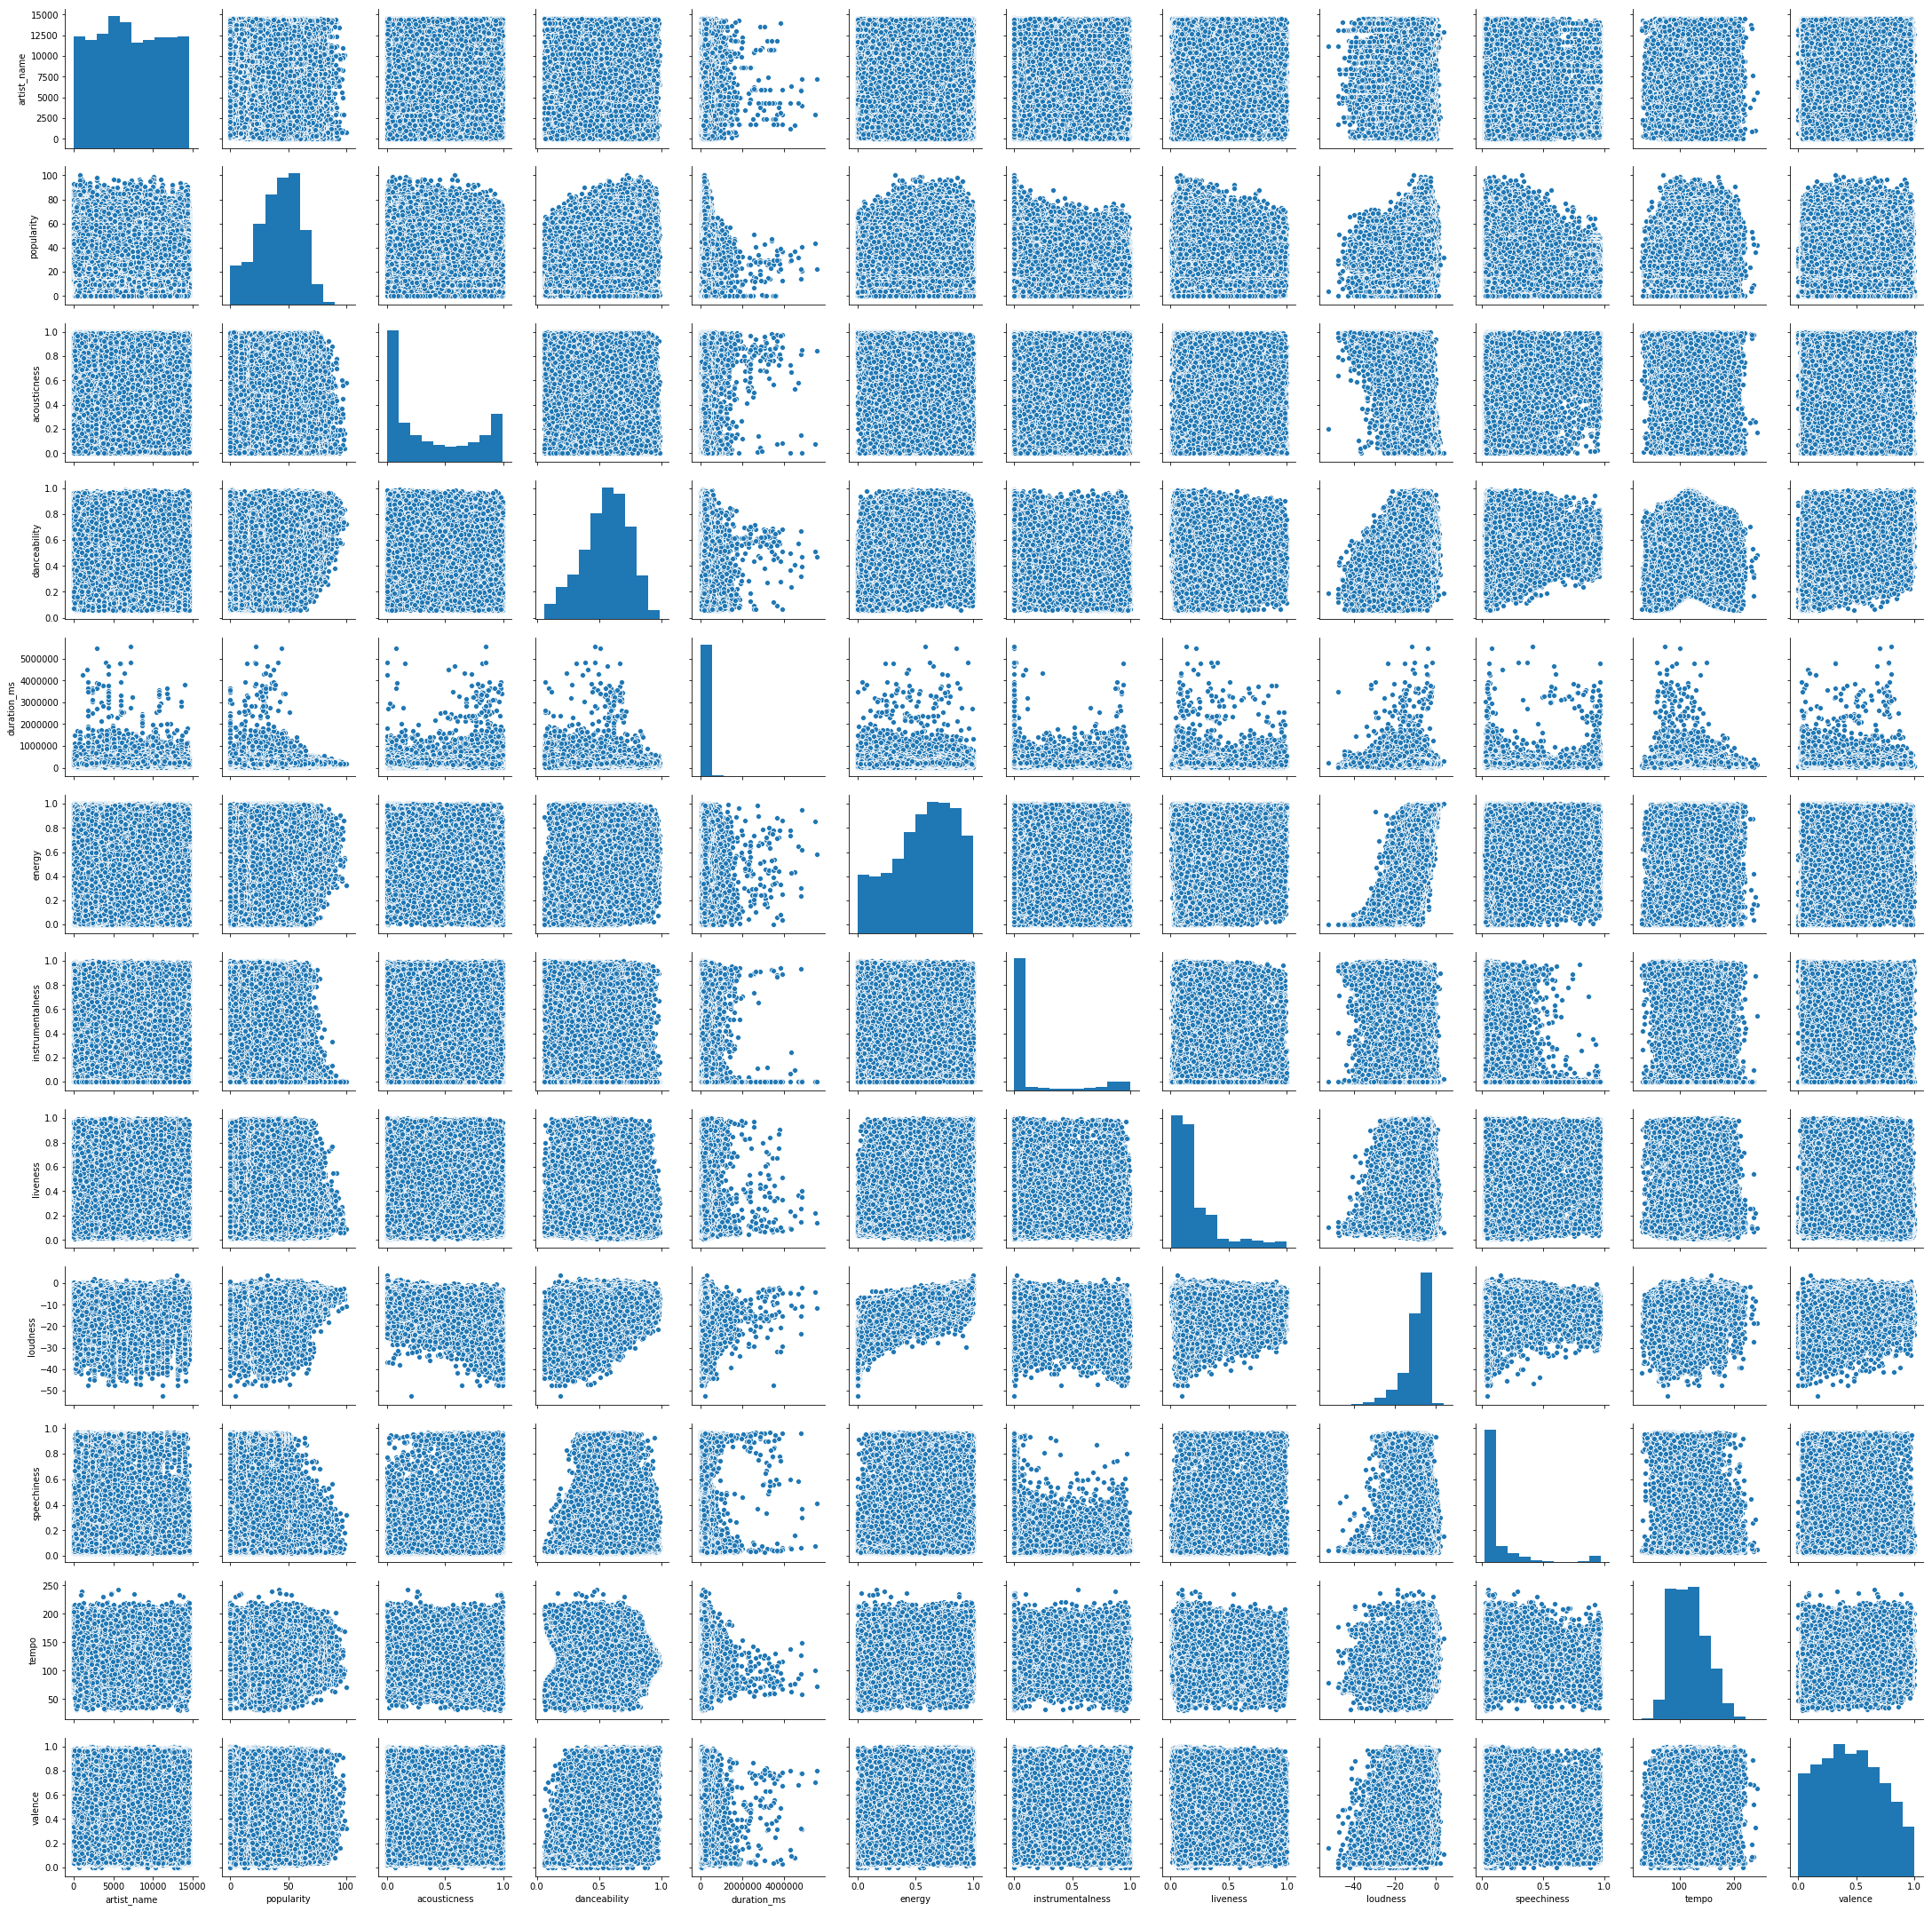

In [18]:
#Checking for correlation in numerical variables
plt.gcf().set_size_inches(16, 10)
sns.pairplot(Data)

In [19]:
#Correlation between input variables
Data.drop('popularity',axis=1).corr()
#Significant correlation between: loudness and acousticness (neg), energy and acousticness (neg)
# danceability and valence (pos), energy and loudness (pos), instrumentalness and loudness (neg),
# speechiness and liveliness (pos)

artist_name  acousticness  danceability  duration_ms  \
artist_name          1.000000     -0.070096      0.033866    -0.018097   
acousticness        -0.070096      1.000000     -0.364546     0.011203   
danceability         0.033866     -0.364546      1.000000    -0.125781   
duration_ms         -0.018097      0.011203     -0.125781     1.000000   
energy               0.051145     -0.725576      0.325807    -0.030550   
instrumentalness    -0.020018      0.316154     -0.364941     0.076021   
liveness            -0.031802      0.069004     -0.041684     0.023783   
loudness             0.062227     -0.690202      0.438668    -0.047618   
speechiness         -0.045707      0.150935      0.134560    -0.016171   
tempo                0.028957     -0.238247      0.021939    -0.028456   
valence              0.046752     -0.325798      0.547154    -0.141811   

                    energy  instrumentalness  liveness  loudness  speechiness  \
artist_name       0.051145         -0.020018 -0.031802  0.062227    -0.045707   
acousticness     -0.725576          0.316154  0.069004 -0.690202     0.150935   
danceability      0.325807         -0.364941 -0.041684  0.438668     0.134560   
duration_ms      -0.030550          0.076021  0.023783 -0.047618    -0.016171   
energy            1.000000         -0.378957  0.192801  0.816088     0.145120   
instrumentalness -0.378957          1.000000 -0.134198 -0.506320    -0.177147   
liveness          0.192801         -0.134198  1.000000  0.045686     0.510147   
loudness          0.816088         -0.506320  0.045686  1.000000    -0.002273   
speechiness       0.145120         -0.177147  0.510147 -0.002273     1.000000   
tempo             0.228774         -0.104133 -0.051355  0.228364    -0.081541   
valence           0.436771         -0.307522  0.011804  0.399901     0.023842   

                     tempo   valence  
artist_name       0.028957  0.046752  
acousticness     -0.238247 -0.325798  
danceability      0.021939  0.547154  
duration_ms      -0.028456 -0.141811  
energy            0.228774  0.436771  
instrumentalness -0.104133 -0.307522  
liveness         -0.051355  0.011804  
loudness          0.228364  0.399901  
speechiness      -0.081541  0.023842  
tempo             1.000000  0.134857  
valence           0.134857  1.000000

## Create Train and Test Data

In [7]:
#For use across all models with ease, encoding all categorical variables
le1=LabelEncoder()
Data['genre']=le1.fit_transform(Data['genre'])
le2=LabelEncoder()
Data['track_name']=le2.fit_transform(Data['track_name'])
le3=LabelEncoder()
Data['key']=le3.fit_transform(Data['key'])
le4=LabelEncoder()
Data['mode']=le4.fit_transform(Data['mode'])
le5=LabelEncoder()
Data['time_signature']=le5.fit_transform(Data['time_signature'])

Data.head()

genre  artist_name  track_name  popularity  acousticness  danceability  \
0      9          828        2189         100        0.5780         0.725   
1     17          828        2189         100        0.5780         0.725   
2      9          828      145159          99        0.0421         0.726   
3     19        10080      142219          99        0.1630         0.833   
4     17          828      145159          99        0.0421         0.726   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       178640   0.321          0.000000    4    0.0884   -10.744     1   
1       178640   0.321          0.000000    4    0.0884   -10.744     1   
2       190440   0.554          0.000000    8    0.1060    -5.290     1   
3       149520   0.539          0.000002    2    0.1010    -7.399     1   
4       190440   0.554          0.000000    8    0.1060    -5.290     1   

   speechiness    tempo  time_signature  valence  
0       0.3230   70.142               1    0.319  
1       0.3230   70.142               1    0.319  
2       0.0917  169.999               1    0.335  
3       0.1780   99.947               1    0.385  
4       0.0917  169.999               1    0.335

In [120]:
x=Data.drop('popularity',axis=1)
y=Data['popularity']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)

In [116]:
Data_num=Data.drop(['genre','artist_name','track_name','key','mode','time_signature'],axis=1)
Data_num.head()
#['acousticness','danceability','duration_ms','energy','instrumentalness','liveliness','loudness','speechiness','tempo','valence']

popularity  acousticness  danceability  duration_ms    energy  \
0         100      0.590358      0.919334    -0.474898 -0.948768   
1         100      0.590358      0.919334    -0.474898 -0.948768   
2          99     -0.920210      0.924721    -0.375685 -0.064366   
3          99     -0.579423      1.501206    -0.719737 -0.121302   
4          99     -0.920210      0.924721    -0.375685 -0.064366   

   instrumentalness  liveness  loudness  speechiness     tempo   valence  
0         -0.489819 -0.638563 -0.195745     1.090110 -1.538070 -0.522627  
1         -0.489819 -0.638563 -0.195745     1.090110 -1.538070 -0.522627  
2         -0.489819 -0.549796  0.713529    -0.156670  1.693669 -0.461104  
3         -0.489812 -0.575014  0.361923     0.308515 -0.573471 -0.268844  
4         -0.489819 -0.549796  0.713529    -0.156670  1.693669 -0.461104

In [117]:
#For use across all models with ease, scaling all numerical data using zscore
from scipy.stats import zscore
scaled_num=Data_num.apply(zscore)
scaled_num.head()

popularity  acousticness  danceability  duration_ms    energy  \
0    3.236547      0.590358      0.919334    -0.474898 -0.948768   
1    3.236547      0.590358      0.919334    -0.474898 -0.948768   
2    3.181572     -0.920210      0.924721    -0.375685 -0.064366   
3    3.181572     -0.579423      1.501206    -0.719737 -0.121302   
4    3.181572     -0.920210      0.924721    -0.375685 -0.064366   

   instrumentalness  liveness  loudness  speechiness     tempo   valence  
0         -0.489819 -0.638563 -0.195745     1.090110 -1.538070 -0.522627  
1         -0.489819 -0.638563 -0.195745     1.090110 -1.538070 -0.522627  
2         -0.489819 -0.549796  0.713529    -0.156670  1.693669 -0.461104  
3         -0.489812 -0.575014  0.361923     0.308515 -0.573471 -0.268844  
4         -0.489819 -0.549796  0.713529    -0.156670  1.693669 -0.461104

In [118]:
#Scaling all numerical features for the benefit of neural network training
Data['acousticness']=scaled_num['acousticness']
Data['danceability']=scaled_num['danceability']
Data['duration_ms']=scaled_num['duration_ms']
Data['energy']=scaled_num['energy']
Data['instrumentalness']=scaled_num['instrumentalness']
Data['liveness']=scaled_num['liveness']
Data['loudness']=scaled_num['loudness']
Data['speechiness']=scaled_num['speechiness']
Data['tempo']=scaled_num['tempo']
Data['valence']=scaled_num['valence']
Data.head()

genre  artist_name  track_name  popularity  acousticness  danceability  \
0      9          828        2189         100      0.590358      0.919334   
1     17          828        2189         100      0.590358      0.919334   
2      9          828      145159          99     -0.920210      0.924721   
3     19        10080      142219          99     -0.579423      1.501206   
4     17          828      145159          99     -0.920210      0.924721   

   duration_ms    energy  instrumentalness  key  liveness  loudness  mode  \
0    -0.474898 -0.948768         -0.489819    4 -0.638563 -0.195745     1   
1    -0.474898 -0.948768         -0.489819    4 -0.638563 -0.195745     1   
2    -0.375685 -0.064366         -0.489819    8 -0.549796  0.713529     1   
3    -0.719737 -0.121302         -0.489812    2 -0.575014  0.361923     1   
4    -0.375685 -0.064366         -0.489819    8 -0.549796  0.713529     1   

   speechiness     tempo  time_signature   valence  
0     1.090110 -1.538070               1 -0.522627  
1     1.090110 -1.538070               1 -0.522627  
2    -0.156670  1.693669               1 -0.461104  
3     0.308515 -0.573471               1 -0.268844  
4    -0.156670  1.693669               1 -0.461104

# Model Building without dimensionality Reduction

## Linear Regression

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math

In [45]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
lr=l.fit(xtrain,ytrain)
scores = cross_val_score(lr, xtrain, ytrain, cv=10)

In [58]:
predicted=lr.predict(xtest)
print("Root Mean squared error: ", math.sqrt(mean_squared_error(ytest,predicted)))
#conf=confusion_matrix(ytest,predicted)

print("Cross-validation scores for Linear Regressor are: ", scores)

Root Mean squared error:  27.864005641672666
Cross-validation scores for Linear Regressor are:  [0.2381038  0.24586915 0.24277713 0.24900913 0.24006443 0.24946806
 0.23938008 0.23340018 0.24762084 0.23316738]


## Ensemble Methods (Random Forest, Bagging, AdaBoost)

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,min_samples_leaf=25)
rfr=rf.fit(xtrain,ytrain)

In [61]:
scores = cross_val_score(rf, xtrain, ytrain, cv=10)
scores

array([0.75287499, 0.7519553 , 0.75196838, 0.75310404, 0.75407708,
       0.75022814, 0.74701388, 0.75366194, 0.74873499, 0.74905015])

In [62]:
print("Cross-validation scores for Linear Regressor are: ", scores)

Root Mean squared error:  27.864005641672666
Cross-validation scores for Linear Regressor are:  [0.75287499 0.7519553  0.75196838 0.75310404 0.75407708 0.75022814
 0.74701388 0.75366194 0.74873499 0.74905015]


In [63]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.75 (+/- 0.00)


Feature ranking:
1. feature 0 (0.680662)
2. feature 3 (0.190637)
3. feature 12 (0.023132)
4. feature 7 (0.022273)
5. feature 1 (0.020519)
6. feature 5 (0.012171)
7. feature 10 (0.008820)
8. feature 9 (0.008299)
9. feature 4 (0.007528)
10. feature 6 (0.006474)
11. feature 15 (0.005844)
12. feature 2 (0.005696)
13. feature 13 (0.005259)
14. feature 8 (0.002001)
15. feature 11 (0.000474)
16. feature 14 (0.000210)


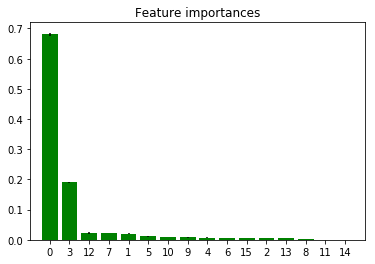

In [64]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(xtrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(xtrain.shape[1]), importances[indices],#list(xtrain)
       color="g", yerr=std[indices], align="center")
plt.xticks(range(xtrain.shape[1]), indices)
plt.xlim([-1, xtrain.shape[1]])
plt.show()

In [33]:
list(xtrain)
# genre contributes the highest to the model
# second comes acousticness

['genre',
 'artist_name',
 'track_name',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

In [73]:
predictedrfr=rfr.predict(xtest)
#conf=confusion_matrix(ytest,predicted)
print("Root Mean squared error: ", math.sqrt(mean_squared_error(ytest,predictedrfr)))
print("Cross-validation scores for Random Forest Regressor are: ", scores)

Root Mean squared error:  9.094978604013138
Cross-validation scores for Random Forest Regressor are:  [0.71764539 0.71519881 0.71694252 0.71464412 0.71552852 0.71474899
 0.71270113 0.71668003 0.70871566 0.71078732]


## Using just genre and acousticness to build the random forest


In [66]:
from sklearn.ensemble import RandomForestRegressor
rf1=RandomForestRegressor(n_estimators=100,min_samples_leaf=25)
#xtrain1['genre']=xtrain['genre']
#xtrain1['acousticness']=xtrain['acousticness']
xtrain1= xtrain.iloc[:, 0:4].drop(['artist_name','track_name'],axis=1)
xtest1=xtest.iloc[:,0:4].drop(['artist_name','track_name'],axis=1)
xtest1.head()

genre  acousticness
148602      8      0.460695
134124     23     -0.844386
98840      14      0.505795
149669      3     -0.827191
72960      14     -0.853688

In [67]:
scores = cross_val_score(rf1, xtrain1, ytrain, cv=10)
scores

array([0.71764539, 0.71519881, 0.71694252, 0.71464412, 0.71552852,
       0.71474899, 0.71270113, 0.71668003, 0.70871566, 0.71078732])

In [68]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.01)


In [69]:
rfr1=rf1.fit(xtrain1,ytrain)
predictedrfr1=rfr1.predict(xtest1)

In [71]:
print("Root Mean squared error: ", math.sqrt(mean_squared_error(ytest,predictedrfr1)))

Root Mean squared error:  9.748360255115957


### RMSE has increased slightly, but not too much, so this model looks like a good contender

## Bagging 

In [75]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

cart=DecisionTreeRegressor()
b=BaggingRegressor(base_estimator=cart, n_estimators=100, random_state=7)

br=b.fit(xtrain,ytrain)
scores = cross_val_score(b, xtrain, ytrain, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.00)


In [76]:
predictedbr=br.predict(xtest)
#conf=confusion_matrix(ytest,predicted)
print("Root Mean squared error: ", math.sqrt(mean_squared_error(ytest,predictedbr)))
print("Cross-validation scores for Bagging Regressor are: ", scores)

Root Mean squared error:  8.983048692978656
Cross-validation scores for Bagging Regressor are:  [0.75719067 0.75599358 0.75652955 0.75718293 0.75985964 0.75605529
 0.75222343 0.75929517 0.75602523 0.75360311]


### Bagging Regressor has improved RMSE slightly as compared to the two variable Random Forest

In [77]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor(n_estimators=100, random_state=7)

abr=ab.fit(xtrain,ytrain)
scores=cross_val_score(ab,xtrain,ytrain,cv=10)

In [18]:
predictedabr=abr.predict(xtest)
#conf=confusion_matrix(ytest,predicted)

print("Cross-validation scores for AdaBoost Regressor are: ", scores)

Cross-validation scores for AdaBosst Regressor are:  [0.39287485 0.42295068 0.41427802 0.42997901 0.4147085  0.38718385
 0.42749914 0.40269404 0.41008546 0.39451769]


In [78]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Root Mean squared error: ", math.sqrt(mean_squared_error(ytest,predictedabr)))

Accuracy: 0.41 (+/- 0.03)
Root Mean squared error:  13.964746867241427


## Can we make the Adaboost better?

In [79]:
cart1=DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=9, min_samples_split=10, min_samples_leaf=11, random_state=7)
ab1=AdaBoostRegressor(base_estimator=cart1,n_estimators=100, learning_rate=0.001,random_state=7)

abr1=ab1.fit(xtrain,ytrain)

In [80]:
scores=cross_val_score(ab1,xtrain,ytrain,cv=10)
predictedabr1=abr1.predict(xtest)

In [81]:
print("Cross-validation scores for AdaBoost Regressor are: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Root Mean squared error: ", math.sqrt(mean_squared_error(ytest,predictedabr1)))

Cross-validation scores for AdaBoost Regressor are:  [0.71343038 0.71460519 0.71152846 0.71212287 0.71080854 0.71238559
 0.70806326 0.71355723 0.70777958 0.7106922 ]
Accuracy: 0.71 (+/- 0.00)
Root Mean squared error:  9.825434642012445


In [82]:
import lightgbm as lgb

In [83]:
lgb_train = lgb.Dataset(xtrain, ytrain)
lgb_eval = lgb.Dataset(xtest, ytest, reference=lgb_train)

In [84]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'binary_logloss','12','l2_root'},
    #'metric': {'binary_logloss'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [85]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=1500)

[1]	valid_0's rmse: 17.5967	valid_0's binary_logloss: -2.68266
Training until validation scores don't improve for 1500 rounds
[2]	valid_0's rmse: 17.3655	valid_0's binary_logloss: -2.68279
[3]	valid_0's rmse: 17.1414	valid_0's binary_logloss: -2.68283
[4]	valid_0's rmse: 16.591	valid_0's binary_logloss: -2.683
[5]	valid_0's rmse: 16.0796	valid_0's binary_logloss: -2.68292
[6]	valid_0's rmse: 15.6056	valid_0's binary_logloss: -2.6825
[7]	valid_0's rmse: 15.4331	valid_0's binary_logloss: -2.68218
[8]	valid_0's rmse: 15.0001	valid_0's binary_logloss: -2.68159
[9]	valid_0's rmse: 14.5973	valid_0's binary_logloss: -2.68081
[10]	valid_0's rmse: 14.2119	valid_0's binary_logloss: -2.67999
[11]	valid_0's rmse: 13.8557	valid_0's binary_logloss: -2.67903
[12]	valid_0's rmse: 13.5348	valid_0's binary_logloss: -2.67788
[13]	valid_0's rmse: 13.2305	valid_0's binary_logloss: -2.67674
[14]	valid_0's rmse: 12.9501	valid_0's binary_logloss: -2.67553
[15]	valid_0's rmse: 12.6963	valid_0's binary_logloss:

[136]	valid_0's rmse: 9.42219	valid_0's binary_logloss: -2.62151
[137]	valid_0's rmse: 9.42034	valid_0's binary_logloss: -2.6215
[138]	valid_0's rmse: 9.4194	valid_0's binary_logloss: -2.6215
[139]	valid_0's rmse: 9.41725	valid_0's binary_logloss: -2.62139
[140]	valid_0's rmse: 9.41654	valid_0's binary_logloss: -2.62137
[141]	valid_0's rmse: 9.41303	valid_0's binary_logloss: -2.62132
[142]	valid_0's rmse: 9.40962	valid_0's binary_logloss: -2.62128
[143]	valid_0's rmse: 9.40842	valid_0's binary_logloss: -2.6213
[144]	valid_0's rmse: 9.40601	valid_0's binary_logloss: -2.62176
[145]	valid_0's rmse: 9.40419	valid_0's binary_logloss: -2.62177
[146]	valid_0's rmse: 9.40279	valid_0's binary_logloss: -2.62182
[147]	valid_0's rmse: 9.40043	valid_0's binary_logloss: -2.62181
[148]	valid_0's rmse: 9.39846	valid_0's binary_logloss: -2.62178
[149]	valid_0's rmse: 9.39564	valid_0's binary_logloss: -2.62175
[150]	valid_0's rmse: 9.39462	valid_0's binary_logloss: -2.62172
[151]	valid_0's rmse: 9.39346

[269]	valid_0's rmse: 9.27803	valid_0's binary_logloss: -2.63835
[270]	valid_0's rmse: 9.27772	valid_0's binary_logloss: -2.63844
[271]	valid_0's rmse: 9.27714	valid_0's binary_logloss: -2.63843
[272]	valid_0's rmse: 9.27639	valid_0's binary_logloss: -2.63904
[273]	valid_0's rmse: 9.27638	valid_0's binary_logloss: -2.63904
[274]	valid_0's rmse: 9.2754	valid_0's binary_logloss: -2.64128
[275]	valid_0's rmse: 9.27487	valid_0's binary_logloss: -2.64127
[276]	valid_0's rmse: 9.27383	valid_0's binary_logloss: -2.64128
[277]	valid_0's rmse: 9.27309	valid_0's binary_logloss: -2.64128
[278]	valid_0's rmse: 9.27302	valid_0's binary_logloss: -2.64128
[279]	valid_0's rmse: 9.27242	valid_0's binary_logloss: -2.64128
[280]	valid_0's rmse: 9.27207	valid_0's binary_logloss: -2.64179
[281]	valid_0's rmse: 9.27168	valid_0's binary_logloss: -2.64179
[282]	valid_0's rmse: 9.2705	valid_0's binary_logloss: -2.64177
[283]	valid_0's rmse: 9.26986	valid_0's binary_logloss: -2.64176
[284]	valid_0's rmse: 9.268

[427]	valid_0's rmse: 9.18659	valid_0's binary_logloss: -2.65653
[428]	valid_0's rmse: 9.18616	valid_0's binary_logloss: -2.65607
[429]	valid_0's rmse: 9.18595	valid_0's binary_logloss: -2.65611
[430]	valid_0's rmse: 9.18566	valid_0's binary_logloss: -2.65612
[431]	valid_0's rmse: 9.18478	valid_0's binary_logloss: -2.65606
[432]	valid_0's rmse: 9.18391	valid_0's binary_logloss: -2.65603
[433]	valid_0's rmse: 9.1831	valid_0's binary_logloss: -2.65547
[434]	valid_0's rmse: 9.18118	valid_0's binary_logloss: -2.65591
[435]	valid_0's rmse: 9.18008	valid_0's binary_logloss: -2.65593
[436]	valid_0's rmse: 9.17879	valid_0's binary_logloss: -2.6555
[437]	valid_0's rmse: 9.17796	valid_0's binary_logloss: -2.65556
[438]	valid_0's rmse: 9.17721	valid_0's binary_logloss: -2.6556
[439]	valid_0's rmse: 9.17683	valid_0's binary_logloss: -2.65559
[440]	valid_0's rmse: 9.17542	valid_0's binary_logloss: -2.65607
[441]	valid_0's rmse: 9.17503	valid_0's binary_logloss: -2.65658
[442]	valid_0's rmse: 9.1737

[555]	valid_0's rmse: 9.12506	valid_0's binary_logloss: -2.66655
[556]	valid_0's rmse: 9.12368	valid_0's binary_logloss: -2.66652
[557]	valid_0's rmse: 9.12308	valid_0's binary_logloss: -2.66607
[558]	valid_0's rmse: 9.1225	valid_0's binary_logloss: -2.66605
[559]	valid_0's rmse: 9.12238	valid_0's binary_logloss: -2.66605
[560]	valid_0's rmse: 9.12196	valid_0's binary_logloss: -2.66603
[561]	valid_0's rmse: 9.12056	valid_0's binary_logloss: -2.66599
[562]	valid_0's rmse: 9.12005	valid_0's binary_logloss: -2.66596
[563]	valid_0's rmse: 9.11939	valid_0's binary_logloss: -2.66592
[564]	valid_0's rmse: 9.11871	valid_0's binary_logloss: -2.66591
[565]	valid_0's rmse: 9.11813	valid_0's binary_logloss: -2.66586
[566]	valid_0's rmse: 9.11778	valid_0's binary_logloss: -2.66544
[567]	valid_0's rmse: 9.11752	valid_0's binary_logloss: -2.66546
[568]	valid_0's rmse: 9.1173	valid_0's binary_logloss: -2.66547
[569]	valid_0's rmse: 9.11688	valid_0's binary_logloss: -2.6655
[570]	valid_0's rmse: 9.1162

[684]	valid_0's rmse: 9.07421	valid_0's binary_logloss: -2.67034
[685]	valid_0's rmse: 9.07431	valid_0's binary_logloss: -2.67091
[686]	valid_0's rmse: 9.07406	valid_0's binary_logloss: -2.6709
[687]	valid_0's rmse: 9.07388	valid_0's binary_logloss: -2.67144
[688]	valid_0's rmse: 9.07373	valid_0's binary_logloss: -2.67143
[689]	valid_0's rmse: 9.07357	valid_0's binary_logloss: -2.67143
[690]	valid_0's rmse: 9.07345	valid_0's binary_logloss: -2.67142
[691]	valid_0's rmse: 9.0732	valid_0's binary_logloss: -2.67144
[692]	valid_0's rmse: 9.07304	valid_0's binary_logloss: -2.67142
[693]	valid_0's rmse: 9.07278	valid_0's binary_logloss: -2.67191
[694]	valid_0's rmse: 9.07248	valid_0's binary_logloss: -2.67189
[695]	valid_0's rmse: 9.07223	valid_0's binary_logloss: -2.67187
[696]	valid_0's rmse: 9.07207	valid_0's binary_logloss: -2.6719
[697]	valid_0's rmse: 9.07195	valid_0's binary_logloss: -2.67193
[698]	valid_0's rmse: 9.07181	valid_0's binary_logloss: -2.67195
[699]	valid_0's rmse: 9.0716

[820]	valid_0's rmse: 9.03696	valid_0's binary_logloss: -2.67667
[821]	valid_0's rmse: 9.03686	valid_0's binary_logloss: -2.67668
[822]	valid_0's rmse: 9.03679	valid_0's binary_logloss: -2.67668
[823]	valid_0's rmse: 9.03681	valid_0's binary_logloss: -2.67668
[824]	valid_0's rmse: 9.03667	valid_0's binary_logloss: -2.67669
[825]	valid_0's rmse: 9.03652	valid_0's binary_logloss: -2.67667
[826]	valid_0's rmse: 9.03617	valid_0's binary_logloss: -2.67612
[827]	valid_0's rmse: 9.03584	valid_0's binary_logloss: -2.67613
[828]	valid_0's rmse: 9.03558	valid_0's binary_logloss: -2.6766
[829]	valid_0's rmse: 9.03498	valid_0's binary_logloss: -2.67658
[830]	valid_0's rmse: 9.03474	valid_0's binary_logloss: -2.6766
[831]	valid_0's rmse: 9.03404	valid_0's binary_logloss: -2.67663
[832]	valid_0's rmse: 9.03387	valid_0's binary_logloss: -2.67716
[833]	valid_0's rmse: 9.03374	valid_0's binary_logloss: -2.6771
[834]	valid_0's rmse: 9.03319	valid_0's binary_logloss: -2.67712
[835]	valid_0's rmse: 9.0329

[962]	valid_0's rmse: 9.00044	valid_0's binary_logloss: -2.68178
[963]	valid_0's rmse: 9.00018	valid_0's binary_logloss: -2.68179
[964]	valid_0's rmse: 9.00012	valid_0's binary_logloss: -2.68178
[965]	valid_0's rmse: 8.99995	valid_0's binary_logloss: -2.68226
[966]	valid_0's rmse: 8.9998	valid_0's binary_logloss: -2.68226
[967]	valid_0's rmse: 8.99954	valid_0's binary_logloss: -2.6818
[968]	valid_0's rmse: 8.99945	valid_0's binary_logloss: -2.68136
[969]	valid_0's rmse: 8.9993	valid_0's binary_logloss: -2.68138
[970]	valid_0's rmse: 8.99922	valid_0's binary_logloss: -2.68141
[971]	valid_0's rmse: 8.99895	valid_0's binary_logloss: -2.68139
[972]	valid_0's rmse: 8.9985	valid_0's binary_logloss: -2.68193
[973]	valid_0's rmse: 8.99817	valid_0's binary_logloss: -2.6819
[974]	valid_0's rmse: 8.99796	valid_0's binary_logloss: -2.68189
[975]	valid_0's rmse: 8.99736	valid_0's binary_logloss: -2.68186
[976]	valid_0's rmse: 8.99685	valid_0's binary_logloss: -2.6823
[977]	valid_0's rmse: 8.99672	v

In [86]:
predictedlgbm = gbm.predict(xtest, num_iteration=gbm.best_iteration)

In [99]:
#result=pd.DataFrame(ytest,predictedlgbm)
#result.head()
ytest=pd.DataFrame(ytest)
ytest['pred']=predictedlgbm
ytest.head()

popularity       pred
148602          35  46.650384
134124          39  31.401761
98840           47  41.498787
149669          35  30.794463
72960           52  43.764344

In [88]:
print("Root Mean squared error: ", math.sqrt(mean_squared_error(ytest['popularity'],predictedlgbm)))
#Light GBM has given very close

Root Mean squared error:  8.990901643903007


## Baggind Regressor and Light GBM Regressor both perform equally in terms of mean squared error on the test set. However, Light GBM takes a fraction of the time taken by the Bagging Regressor model

In [93]:
from xgboost import XGBRegressor

In [111]:
xg = XGBRegressor()
#objective ='reg:tweedie', colsample_bytree = 0.3, learning_rate = 0.001, max_depth = 5, alpha = 10, n_estimators = 100

In [112]:
xgr = xg.fit(xtrain,ytrain)
scores=cross_val_score(xg,xtrain,ytrain,cv=10)
predictedxg=xgr.predict(xtest)

C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:49:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:50:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:50:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:50:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:50:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:51:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:51:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:51:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:51:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:51:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [113]:
scores=cross_val_score(xg,xtrain,ytrain,cv=10)
scores

C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:55:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:55:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:56:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:56:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:56:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:56:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:57:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:57:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:57:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:57:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.70121012, 0.70023407, 0.70329788, 0.70269443, 0.70265066,
       0.69725905, 0.69833882, 0.70585231, 0.6966976 , 0.69506523])

In [114]:
print("Cross-validation scores for XGBoost Regressor are: ", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Root Mean squared error: ", math.sqrt(mean_squared_error(ytest,predictedxg)))

Cross-validation scores for XGBoost Regressor are:  [0.70121012 0.70023407 0.70329788 0.70269443 0.70265066 0.69725905
 0.69833882 0.70585231 0.6966976  0.69506523]
Accuracy: 0.70 (+/- 0.01)
Root Mean squared error:  10.021561371798551


In [121]:
ytest=pd.DataFrame(ytest)

In [122]:
#Putting All Results together
ytest['predictedlr']=predicted
ytest['predictedrf1']=predictedrfr
ytest['predictedrfr2']=predictedrfr1
ytest['predictedbr']=predictedbr
ytest['predictedabr']=predictedabr
ytest['predictedabr1']=predictedabr1
ytest['predictedlgbm']=predictedlgbm
ytest['predictedxg']=predictedxg

popularity  predictedlr  predictedrf1  predictedrfr2  predictedbr  \
148602          35    79.492301     45.594031      44.446082        43.19   
134124          39    76.851739     28.259016      29.874069        29.83   
98840           47    62.572267     38.589409      39.563638        37.46   
149669          35    33.006328     33.554390      36.197419        31.67   
72960           52    63.130453     43.363803      42.091879        42.07   

        predictedabr  predictedabr1  predictedlgbm  predictedxg  
148602     42.722090      50.537690      46.650384    46.432728  
134124     40.326923      28.767206      31.401761    34.179142  
98840      46.938399      42.489566      41.498787    42.290325  
149669     34.386980      36.052016      30.794463    31.804565  
72960      46.938399      42.215244      43.764344    46.178364

In [124]:
ytest.head(20)

popularity  predictedlr  predictedrf1  predictedrfr2  predictedbr  \
148602          35    79.492301     45.594031      44.446082        43.19   
134124          39    76.851739     28.259016      29.874069        29.83   
98840           47    62.572267     38.589409      39.563638        37.46   
149669          35    33.006328     33.554390      36.197419        31.67   
72960           52    63.130453     43.363803      42.091879        42.07   
184614          26    52.728132     10.056731       3.755519         8.38   
41777           58    84.269041     58.964918      58.246840        56.85   
95356           47    51.388402     44.015606      45.512163        44.78   
184540          26    -7.039002     17.791529      16.030768        17.99   
161769          32    49.669048     33.216513      30.115863        31.65   
198572          21    51.654733     14.223721      14.540588        15.81   
167666          31    59.073991     33.827521      35.477417        34.46   
37341           59    84.845102     51.930811      54.524434        53.61   
140331          37    61.607775     47.012990      47.964064        48.41   
9149            69    69.680849     57.308129      58.695266        56.94   
86538           49    80.074843     51.078636      52.415255        50.48   
27419           62    73.086096     59.969685      59.573048        62.58   
231653           0    15.563761     17.921633      27.400180        14.58   
97613           47    53.472508     51.050804      52.620170        51.22   
32137           61    63.214041     49.330758      46.797150        49.41   

        predictedabr  predictedabr1  predictedlgbm  predictedxg  
148602     42.722090      50.537690      46.650384    46.432728  
134124     40.326923      28.767206      31.401761    34.179142  
98840      46.938399      42.489566      41.498787    42.290325  
149669     34.386980      36.052016      30.794463    31.804565  
72960      46.938399      42.215244      43.764344    46.178364  
184614     30.601653       6.032911       5.467130    11.442655  
41777      48.577065      56.945853      59.101561    57.381733  
95356      44.087142      50.537690      46.083318    48.091125  
184540     23.982988      15.298111      17.511209    12.537790  
161769     30.601653      29.918326      30.892911    29.952543  
198572     17.679066      13.426339      12.736859    14.139488  
167666     35.734822      34.289383      34.197150    34.676197  
37341      50.041064      51.889404      51.325826    54.080902  
140331     46.938399      50.537690      46.112373    48.539356  
9149       47.166578      50.537690      56.572091    53.442291  
86538      50.041064      52.251805      51.702654    54.159618  
27419      50.041064      59.697041      62.082078    58.469753  
231653     30.601653      16.987597      12.410913    21.548424  
97613      32.758001      52.052045      47.261451    41.283821  
32137      46.938399      50.537690      46.049112    47.731892

#  Across all the Models, LGBM and Bagging regressors perform the best